# simplified attention mechanism

In [2]:
import torch
import torch.nn as nn

In [2]:
inputs =  torch.tensor(
  [
    [0.43, 0.15, 0.89], #x^1
   [0.55, 0.87, 0.66], #X^2
   [0.57, 0.85, 0.64], #X^3 
   [0.22, 0.58, 0.33], #X^4    
   [0.77, 0.25, 0.10], #X^5     
   [0.05, 0.80, 0.55] #X^6
  ]    
)

In [3]:
#lets get the attention scores with respect to X^2
# we get dot product for all token emmbedings with it
query = inputs[1]
attn_scores2 = torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_scores2[i] = torch.dot(x_i,query)
print(attn_scores2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [4]:
#normalize the attention weights
attn_weights_2 = attn_scores2/attn_scores2.sum()
print(attn_weights_2)
print(sum(attn_weights_2))

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


In [5]:
#normaly this normalisation is done by applying softmax function
attn_weights_2 = torch.softmax(attn_scores2,dim=0)
print(attn_weights_2)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])


In [6]:
#to calculate context vector each embedding vector is multiplied by 
#corresponding attention weight and sum them up
context_vec2 =torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec2 += attn_weights_2[i]*x_i
print(context_vec2)

tensor([0.4419, 0.6515, 0.5683])


In [7]:
context_vec2 = torch.matmul(attn_weights_2,inputs)
print(context_vec2)

tensor([0.4419, 0.6515, 0.5683])


In [8]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [9]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [10]:
attn_weights = torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [11]:
context_vec = torch.matmul(attn_weights,inputs)
print(context_vec)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# compute attention mechanism with trinable parameters

In [12]:
inputs =  torch.tensor(
  [
    [0.43, 0.15, 0.89], #x^1
   [0.55, 0.87, 0.66], #X^2
   [0.57, 0.85, 0.64], #X^3 
   [0.22, 0.58, 0.33], #X^4    
   [0.77, 0.25, 0.10], #X^5     
   [0.05, 0.80, 0.55] #X^6
  ]    
)

In [13]:
#claculate query key value vectors for x2
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2
torch.manual_seed(123)

In [14]:
w_query = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
w_key = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
w_value = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)

In [15]:
query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value
print(query_2)

tensor([0.4306, 1.4551])


In [16]:
#calculate  key value vectors for all the other vectors
keys = inputs @ w_key
values = inputs @ w_value

In [17]:
attn_score2 = query_2 @ keys.T
attn_score2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [18]:
d_k = keys.shape[-1]
attn_weights2 = torch.softmax(attn_score2/d_k**(0.5),dim=-1)
print(attn_weights2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [19]:
context_vec2 =  attn_weights2 @ values
print(context_vec2)

tensor([0.3061, 0.8210])


In [20]:
import torch.nn as nn
class SelfAttenton_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super() .__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))
        
    def forward(self,x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In [21]:
torch.manual_seed(123)
sa_v1 = SelfAttenton_v1(d_in,d_out) #python super() allows calls methods explicitly naming them
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [22]:
#optimized weight initialization with nn.Linear
import torch.nn as nn
class SelfAttention_v2(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super() .__init__()
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)
        
    def forward(self,x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In [23]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


# Masked attention machanism

In [24]:
inputs =  torch.tensor(
  [
    [0.43, 0.15, 0.89], #x^1
   [0.55, 0.87, 0.66], #X^2
   [0.57, 0.85, 0.64], #X^3 
   [0.22, 0.58, 0.33], #X^4    
   [0.77, 0.25, 0.10], #X^5     
   [0.05, 0.80, 0.55] #X^6
  ]    
)

queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
print(attn_weights)

print("-----------------------------------------------------------------")

#create metrix with above diagonal is zero
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
print(mask_simple)

print("-----------------------------------------------------------------")


#multiply it with attention weight to get simple masked attention
masked_simple = attn_weights*mask_simple
print(masked_simple)
print("-----------------------------------------------------------------")

row_sums = masked_simple.sum(dim=-1,keepdim=True)
masked_simple_norm = masked_simple/row_sums
print(masked_simple_norm)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)
-----------------------------------------------------------------
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])
-----------------------------------------------------------------
tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658

In [25]:
#efficient way to get masked attenion


mask = torch.triu(torch.ones(context_length,context_length),diagonal=1)
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)
print(masked)
print("-----------------------------------------------------------------")
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5,dim=1)
print(attn_weights)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)
-----------------------------------------------------------------
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [26]:
#masking atention weights with dropout
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [27]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


# class for attention mechanism with casual  attention and dropout modifications


In [28]:
# this creates two input text with six tokens each;each token has embedding dimension of 3
batch = torch.stack((inputs,inputs),dim=0) 
print(batch.shape)

torch.Size([2, 6, 3])


In [29]:
class CasualAttention(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.w_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.w_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.w_value = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask',
                            torch.triu(torch.ones(context_length,context_length),diagonal=1)
                            )
        
    def forward(self,x):
        b,num_tokens,d_in = x.shape
        keys = self.w_key(x)
        queries = self.w_query(x)
        values = self.w_value(x)
        
        attn_scores = queries @ keys.transpose(1,2)
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)
        attn_weights = torch.softmax(
            attn_scores/keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights)
        context_vector = attn_weights @ values
        return context_vector
    
        

In [30]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CasualAttention(d_in,d_out,context_length,0.0)
context_vecs = ca(batch)
print('context_vecs.shape:',context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


# Wrapper class for multihead attention

In [31]:
class MultiHeadAttentionWraper(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
            super().__init__()
            self.heads = nn.ModuleList(
                [CasualAttention(
                    d_in, d_out, context_length, dropout, qkv_bias
                ) for _ in range(num_heads)]
            )
            
    def forward(self,x):
        return torch.cat([head(x) for head in self.heads],dim=-1)

In [32]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3,2
mha = MultiHeadAttentionWraper(
    d_in,d_out,context_length,0.0,num_heads=2
)
context_vecs = mha(batch)
print(context_vecs)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)


# Multihead attention with weight splits

In [33]:
class MultiHeadAttention(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0),"d_out must be divisible by num_heads"
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.w_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.w_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.w_value = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.out_proj = nn.Linear(d_out,d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal=1))
        
    def forward(self,x):
        b,num_tokens,d_in = x.shape
        keys = self.w_key(x)
        queries = self.w_query(x)
        values = self.w_value(x)
            
        keys = keys.view(b,num_tokens,self.num_heads,self.head_dim)
        values = values.view(b,num_tokens,self.num_heads,self.head_dim)
        queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
            
        keys = keys.transpose(1,2)
        queries = queries.transpose(1,2)
        values = values.transpose(1,2)
        
        attn_scores = queries @ keys.transpose(2, 3)  
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]    
        attn_scores.masked_fill_(mask_bool,-torch.inf)
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = (attn_weights @ values).transpose(1,2)
        context_vec = context_vec.contiguous().view(b,num_tokens,self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec 
                   

In [34]:
inputs =  torch.tensor(
  [
    [0.43, 0.15, 0.89], #x^1
   [0.55, 0.87, 0.66], #X^2
   [0.57, 0.85, 0.64], #X^3 
   [0.22, 0.58, 0.33], #X^4    
   [0.77, 0.25, 0.10], #X^5     
   [0.05, 0.80, 0.55] #X^6
  ]    
)

batch = torch.stack((inputs,inputs),dim=0) 

torch.manual_seed(123)
batch_size,context_length,d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in,d_out,context_length,0.0,num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:",context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [35]:
###################################################################################
# test #
###################################################################################

In [36]:
 a = torch.tensor([[
             [
              [0.2745, 0.6584, 0.2775, 0.8573,0.6584, 0.2775],   
              [0.8993, 0.0390, 0.9268, 0.7388,0.8993, 0.0390],
              [0.7179, 0.7058, 0.9156, 0.4340,0.7179, 0.9156]
             ],
     
           [
            [0.0772, 0.3565, 0.1479, 0.5331],
            [0.4066, 0.2318, 0.4545, 0.9737],
            [0.4606, 0.5159, 0.4220, 0.5786]
           ]
 ]])
print("shape of a: ",a.shape)
print("shape of a.T: ",a.transpose(2,3).shape)
print("-----Dot product of a and a.T-----")
print(a @ a.transpose(2,3))

shape of a:  torch.Size([1, 2, 3, 4])
shape of a.T:  torch.Size([1, 2, 4, 3])
-----Dot product of a and a.T-----
tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


## Mutihead class explanation

In [45]:
input_data = torch.tensor([
              [0.2745, 0.6584, 0.2775, 0.8573,0.6584, 0.2775],   
              [0.8993, 0.0390, 0.9268, 0.7388,0.8993, 0.0390],
              [0.7179, 0.7058, 0.9156, 0.4340,0.7179, 0.9156]       
])
batch = torch.stack((input_data,input_data),dim=0)
print(batch)
print("batch shape: ",batch.shape)

tensor([[[0.2745, 0.6584, 0.2775, 0.8573, 0.6584, 0.2775],
         [0.8993, 0.0390, 0.9268, 0.7388, 0.8993, 0.0390],
         [0.7179, 0.7058, 0.9156, 0.4340, 0.7179, 0.9156]],

        [[0.2745, 0.6584, 0.2775, 0.8573, 0.6584, 0.2775],
         [0.8993, 0.0390, 0.9268, 0.7388, 0.8993, 0.0390],
         [0.7179, 0.7058, 0.9156, 0.4340, 0.7179, 0.9156]]])
batch shape:  torch.Size([2, 3, 6])


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <p>Above batch has:</p>
    <ul>
        <li>Batch size of 2</li>
        <li>Number of embedded tokens 3</li>
        <li>Dimensionality of the input tokens 6</li>
    </ul>
</div>


Lets say we want a context vector of d_out=6 (output dimention of the context vector) and we want to process it in multiple heads we need some additional details  
- number of heads  
- dimention of head  

we can calculate head dimention by
  
  
head_dim = d_out // num_heads  

So we split output dimention in to number of heads-dimention and head-dimention so can parallay process each head.  

we follow bellow steps


## Linear projection to to get quary, key, value vectors

In [46]:
x = batch
batch_size,context_length,d_in = batch.shape
d_out = 6

#initializing q,k,v weight metrices
w_q = nn.Linear(d_in,d_out,bias=False)
w_k = nn.Linear(d_in,d_out,bias=False)
w_v = nn.Linear(d_in,d_out,bias=False)

#linear projection to get quary, key, value vectors
queries = w_q(x)
keys =  w_k(x)
values = w_v(x)

print("shape: ",queries.shape)

shape:  torch.Size([2, 3, 6])


In [47]:
print("queries :", queries)

queries : tensor([[[-0.2077,  0.0027,  0.3938,  0.3667, -0.3282,  0.4679],
         [-0.0103,  0.0498,  0.2366,  0.4801, -0.8703,  0.1963],
         [-0.3723, -0.0854,  0.3992,  0.4328, -0.6178,  0.7257]],

        [[-0.2077,  0.0027,  0.3938,  0.3667, -0.3282,  0.4679],
         [-0.0103,  0.0498,  0.2366,  0.4801, -0.8703,  0.1963],
         [-0.3723, -0.0854,  0.3992,  0.4328, -0.6178,  0.7257]]],
       grad_fn=<UnsafeViewBackward0>)


## output dimention is split in to number of head dimention and head dimention

Here we get shape of (batch_size,context_length,d_out).so in above q,k,v vectors are reshape in to (batch_size, context_length, num_heads, head_dim)

In [48]:
num_heads = 2
head_dim = d_out//num_heads

#reshaping
queries = queries.view(batch_size,context_length,num_heads,head_dim)
keys = keys.view(batch_size,context_length,num_heads,head_dim)
values = values.view(batch_size,context_length,num_heads,head_dim)

print("shape: ",queries.shape)

shape:  torch.Size([2, 3, 2, 3])


In [49]:
print("queries :",queries)

queries : tensor([[[[-0.2077,  0.0027,  0.3938],
          [ 0.3667, -0.3282,  0.4679]],

         [[-0.0103,  0.0498,  0.2366],
          [ 0.4801, -0.8703,  0.1963]],

         [[-0.3723, -0.0854,  0.3992],
          [ 0.4328, -0.6178,  0.7257]]],


        [[[-0.2077,  0.0027,  0.3938],
          [ 0.3667, -0.3282,  0.4679]],

         [[-0.0103,  0.0498,  0.2366],
          [ 0.4801, -0.8703,  0.1963]],

         [[-0.3723, -0.0854,  0.3992],
          [ 0.4328, -0.6178,  0.7257]]]], grad_fn=<ViewBackward0>)


In [50]:
print("keys :",keys)

keys : tensor([[[[ 0.3515,  0.2409, -0.1456],
          [ 0.4784,  0.1651,  0.4541]],

         [[-0.1191,  0.5451,  0.1034],
          [ 0.3757,  0.0823,  0.0383]],

         [[-0.1510,  0.5555, -0.0889],
          [ 0.6659,  0.0394, -0.1219]]],


        [[[ 0.3515,  0.2409, -0.1456],
          [ 0.4784,  0.1651,  0.4541]],

         [[-0.1191,  0.5451,  0.1034],
          [ 0.3757,  0.0823,  0.0383]],

         [[-0.1510,  0.5555, -0.0889],
          [ 0.6659,  0.0394, -0.1219]]]], grad_fn=<ViewBackward0>)


In [51]:
print("values :",values)

values : tensor([[[[-0.1781, -0.5251, -0.4096],
          [ 0.0110, -0.0604,  0.0175]],

         [[-0.2055, -0.5814, -0.5027],
          [-0.4761,  0.7434,  0.6308]],

         [[-0.1179, -0.6514, -0.2176],
          [-0.1764,  0.2605,  0.1596]]],


        [[[-0.1781, -0.5251, -0.4096],
          [ 0.0110, -0.0604,  0.0175]],

         [[-0.2055, -0.5814, -0.5027],
          [-0.4761,  0.7434,  0.6308]],

         [[-0.1179, -0.6514, -0.2176],
          [-0.1764,  0.2605,  0.1596]]]], grad_fn=<ViewBackward0>)


How heads are created

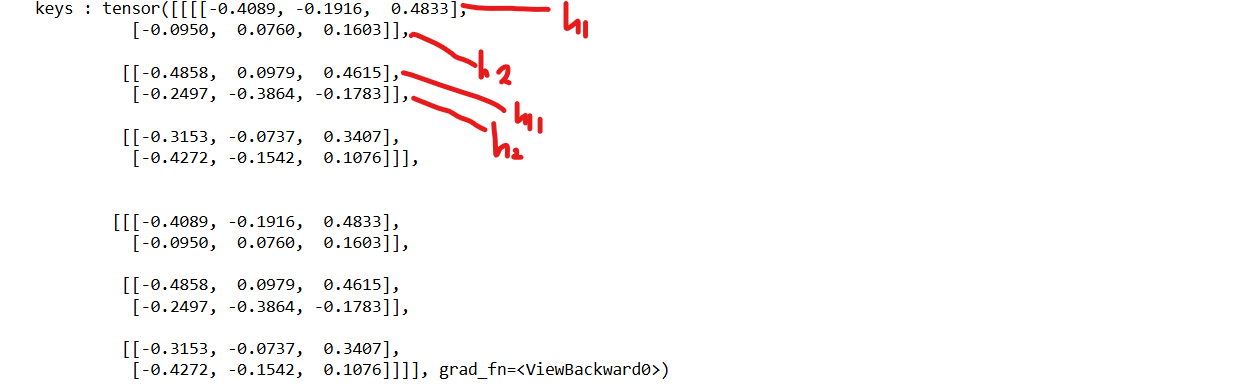  

h1 - head1  
h2 -  head2

## Seperate each heads  
 

In [52]:
queries = queries.transpose(1,2)
queries

tensor([[[[-0.2077,  0.0027,  0.3938],
          [-0.0103,  0.0498,  0.2366],
          [-0.3723, -0.0854,  0.3992]],

         [[ 0.3667, -0.3282,  0.4679],
          [ 0.4801, -0.8703,  0.1963],
          [ 0.4328, -0.6178,  0.7257]]],


        [[[-0.2077,  0.0027,  0.3938],
          [-0.0103,  0.0498,  0.2366],
          [-0.3723, -0.0854,  0.3992]],

         [[ 0.3667, -0.3282,  0.4679],
          [ 0.4801, -0.8703,  0.1963],
          [ 0.4328, -0.6178,  0.7257]]]], grad_fn=<TransposeBackward0>)

Seperate heads
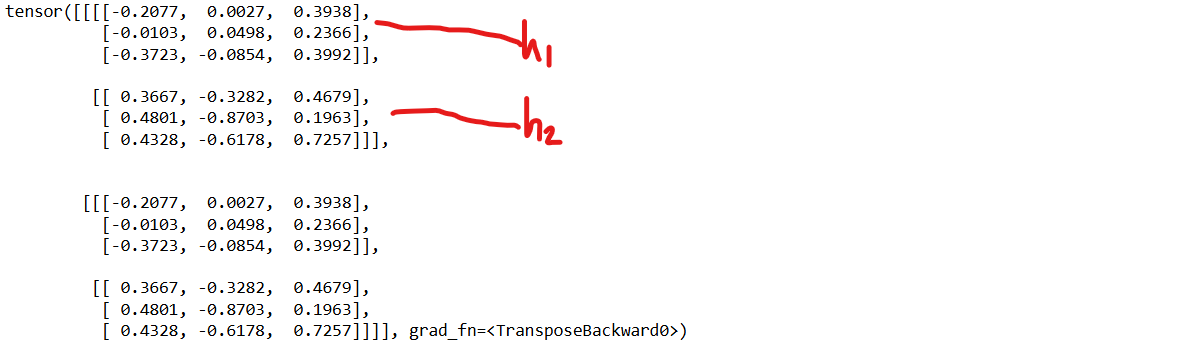

In [53]:
keys = keys.transpose(1,2)
values = values.transpose(1,2)

### Now we need to get attention scores,  

so we need to get matrix multiplication between queries and keys. therefore we need to transpose keys vector 

In [56]:
attention_scores = queries @ keys.transpose(2,3)
print("attention scores :", attention_scores)
print("shape:",attention_scores.shape)

attention scores : tensor([[[[-0.1297,  0.0669, -0.0021],
          [-0.0261,  0.0528,  0.0082],
          [-0.2096,  0.0390, -0.0267]],

         [[ 0.3337,  0.1287,  0.1743],
          [ 0.1751,  0.1163,  0.2615],
          [ 0.4345,  0.1396,  0.1754]]],


        [[[-0.1297,  0.0669, -0.0021],
          [-0.0261,  0.0528,  0.0082],
          [-0.2096,  0.0390, -0.0267]],

         [[ 0.3337,  0.1287,  0.1743],
          [ 0.1751,  0.1163,  0.2615],
          [ 0.4345,  0.1396,  0.1754]]]], grad_fn=<UnsafeViewBackward0>)
shape: torch.Size([2, 2, 3, 3])


In [59]:
attention_weights = torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
context_vector = attention_weights @ values
print("context vector :",context_vector)
print("shape :",context_vector.shape)

context vector : tensor([[[[-0.1674, -0.5873, -0.3776],
          [-0.1674, -0.5863, -0.3775],
          [-0.1673, -0.5880, -0.3772]],

         [[-0.2045,  0.2991,  0.2583],
          [-0.2103,  0.3089,  0.2634],
          [-0.2006,  0.2925,  0.2540]]],


        [[[-0.1674, -0.5873, -0.3776],
          [-0.1674, -0.5863, -0.3775],
          [-0.1673, -0.5880, -0.3772]],

         [[-0.2045,  0.2991,  0.2583],
          [-0.2103,  0.3089,  0.2634],
          [-0.2006,  0.2925,  0.2540]]]], grad_fn=<UnsafeViewBackward0>)
shape : torch.Size([2, 2, 3, 3])


#### Concatonate to get context vector with desired output dimention

In [61]:
context_vector = context_vector.transpose(1,2)
# reshaping 
context_vector = context_vector.contiguous().view(batch_size,context_length,d_out)
print("context vector",context_vector)

context vector tensor([[[-0.1674, -0.5873, -0.3776, -0.1674, -0.5863, -0.3775],
         [-0.1673, -0.5880, -0.3772, -0.2045,  0.2991,  0.2583],
         [-0.2103,  0.3089,  0.2634, -0.2006,  0.2925,  0.2540]],

        [[-0.1674, -0.5873, -0.3776, -0.1674, -0.5863, -0.3775],
         [-0.1673, -0.5880, -0.3772, -0.2045,  0.2991,  0.2583],
         [-0.2103,  0.3089,  0.2634, -0.2006,  0.2925,  0.2540]]],
       grad_fn=<ViewBackward0>)


## Optimized multihead attention

In [81]:
input_data = torch.tensor([
              [0.2745, 0.6584, 0.2775, 0.8573,0.6584, 0.2775],   
              [0.8993, 0.0390, 0.9268, 0.7388,0.8993, 0.0390],
              [0.7179, 0.7058, 0.9156, 0.4340,0.7179, 0.9156]       
])
batch = torch.stack((input_data,input_data),dim=0)
print(batch)
print("batch shape: ",batch.shape)

tensor([[[0.2745, 0.6584, 0.2775, 0.8573, 0.6584, 0.2775],
         [0.8993, 0.0390, 0.9268, 0.7388, 0.8993, 0.0390],
         [0.7179, 0.7058, 0.9156, 0.4340, 0.7179, 0.9156]],

        [[0.2745, 0.6584, 0.2775, 0.8573, 0.6584, 0.2775],
         [0.8993, 0.0390, 0.9268, 0.7388, 0.8993, 0.0390],
         [0.7179, 0.7058, 0.9156, 0.4340, 0.7179, 0.9156]]])
batch shape:  torch.Size([2, 3, 6])


In [89]:
x = batch
batch_size,context_length,d_in = batch.shape
d_out = 6

#initializing q,k,v weight metrices
w_q = nn.Linear(d_in,d_out,bias=False)
w_k = nn.Linear(d_in,d_out,bias=False)

#linear projection to get quary, key, value vectors
queries = w_q(x)
keys =  w_k(x)
V = x

In [91]:
num_heads = 2
head_dim = d_out//num_heads

#reshaping
queries = queries.view(batch_size,context_length,num_heads,head_dim)
keys = keys.view(batch_size,context_length,num_heads,head_dim)
print("shape: ",queries.shape)

shape:  torch.Size([2, 3, 2, 3])


In [92]:
queries = queries.transpose(1,2)
keys = keys.transpose(1,2)
attention_scores = queries @ keys.transpose(2,3)
print("attention scores :", attention_scores)
print("shape:",attention_scores.shape)

attention scores : tensor([[[[ 0.0430,  0.0376,  0.0732],
          [-0.2803, -0.4273, -0.2455],
          [ 0.0541, -0.0342,  0.1366]],

         [[-0.0250, -0.1112,  0.0318],
          [-0.0378, -0.1385,  0.0541],
          [-0.0443, -0.0262,  0.1318]]],


        [[[ 0.0430,  0.0376,  0.0732],
          [-0.2803, -0.4273, -0.2455],
          [ 0.0541, -0.0342,  0.1366]],

         [[-0.0250, -0.1112,  0.0318],
          [-0.0378, -0.1385,  0.0541],
          [-0.0443, -0.0262,  0.1318]]]], grad_fn=<UnsafeViewBackward0>)
shape: torch.Size([2, 2, 3, 3])


In [93]:
V = V.view(batch_size,context_length,num_heads,head_dim)
V = V.transpose(1,2)
V

tensor([[[[0.2745, 0.6584, 0.2775],
          [0.8993, 0.0390, 0.9268],
          [0.7179, 0.7058, 0.9156]],

         [[0.8573, 0.6584, 0.2775],
          [0.7388, 0.8993, 0.0390],
          [0.4340, 0.7179, 0.9156]]],


        [[[0.2745, 0.6584, 0.2775],
          [0.8993, 0.0390, 0.9268],
          [0.7179, 0.7058, 0.9156]],

         [[0.8573, 0.6584, 0.2775],
          [0.7388, 0.8993, 0.0390],
          [0.4340, 0.7179, 0.9156]]]])

In [94]:
attention_weights = torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
context_vector = attention_weights @ values
context_vector = context_vector.transpose(1,2)
# reshaping 
context_vector = context_vector.contiguous().view(batch_size,context_length,d_out)
print("context vector",context_vector)

context vector tensor([[[-0.1668, -0.5863, -0.3756, -0.2091,  0.3069,  0.2622],
         [-0.1658, -0.5865, -0.3720, -0.2082,  0.3055,  0.2605],
         [-0.1657, -0.5871, -0.3719, -0.2134,  0.3141,  0.2667]],

        [[-0.1668, -0.5863, -0.3756, -0.2091,  0.3069,  0.2622],
         [-0.1658, -0.5865, -0.3720, -0.2082,  0.3055,  0.2605],
         [-0.1657, -0.5871, -0.3719, -0.2134,  0.3141,  0.2667]]],
       grad_fn=<ViewBackward0>)


In [ ]:
class OptimizedMultiHeadAttention(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0),"d_out must be divisible by num_heads"
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.w_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.w_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.out_proj = nn.Linear(d_out,d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal=1))
        
    def forward(self,x):
        b,num_tokens,d_in = x.shape
        keys = self.w_key(x)
        queries = self.w_query(x)
            
        keys = keys.view(b,num_tokens,self.num_heads,self.head_dim)
        values = x.view(b,num_tokens,self.num_heads,self.head_dim)
        queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
            
        keys = keys.transpose(1,2)
        queries = queries.transpose(1,2)
        values = values.transpose(1,2)
        
        attn_scores = queries @ keys.transpose(2, 3)  
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]    
        attn_scores.masked_fill_(mask_bool,-torch.inf)
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = (attn_weights @ values).transpose(1,2)
        context_vec = context_vec.contiguous().view(b,num_tokens,self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec 
                   

## Efficient multihead attention

In [96]:
class EfficientMultiHeadAttention(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0),"d_out must be divisible by num_heads"
        
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads
        self.w_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.out_proj = nn.Linear(d_out,d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal=1))
        
    def forward(self,x):
        b,num_tokens,d_in = x.shape
        queries = self.w_query(x)
            
        keys = x.view(b,num_tokens,self.num_heads,self.head_dim)
        values = x.view(b,num_tokens,self.num_heads,self.head_dim)
        queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
            
        keys = keys.transpose(1,2)
        queries = queries.transpose(1,2)
        values = values.transpose(1,2)
        
        attn_scores = queries @ keys.transpose(2, 3)  
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]    
        attn_scores.masked_fill_(mask_bool,-torch.inf)
        attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec = (attn_weights @ values).transpose(1,2)
        context_vec = context_vec.contiguous().view(b,num_tokens,self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec 
                   

In [131]:
inputs =  torch.tensor(
  [
    [0.43, 0.15, 0.89], #x^1
   [0.55, 0.87, 0.66], #X^2
   [0.57, 0.85, 0.64], #X^3 
   [0.22, 0.58, 0.33], #X^4    
   [0.77, 0.25, 0.10], #X^5     
   [0.05, 0.80, 0.55] #X^6
  ]    
)

batch = torch.stack((inputs,inputs),dim=0) 

torch.manual_seed(123)
batch_size,context_length,d_in = batch.shape
d_out = 3
mha = EfficientMultiHeadAttention(d_in,d_out,context_length,0.0,num_heads=3)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:",context_vecs.shape)

tensor([[[ 0.1366, -0.2666,  0.6299],
         [ 0.0486, -0.3934,  0.4185],
         [ 0.0216, -0.4372,  0.3483],
         [-0.0181, -0.3713,  0.3232],
         [-0.0167, -0.3554,  0.2943],
         [-0.0415, -0.3257,  0.2941]],

        [[ 0.1366, -0.2666,  0.6299],
         [ 0.0486, -0.3934,  0.4185],
         [ 0.0216, -0.4372,  0.3483],
         [-0.0181, -0.3713,  0.3232],
         [-0.0167, -0.3554,  0.2943],
         [-0.0415, -0.3257,  0.2941]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 3])
